<a href="https://colab.research.google.com/github/aman9213/CS6910-Assignment1/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tqdm import tqdm
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
import warnings
warnings.filterwarnings("ignore")
import random

In [ ]:
!pip install wandb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.0 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=030c439815e9ed06f8eef029855a72ccbaefc0270be7aca041e6369a753ce82f
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


In [2]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [3]:
print("shape of data:",train_X.shape)
print(train_y)
print(test_y)

shape of data: (60000, 28, 28)
[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


# Q1.ploting sample images from each class 

In [4]:

items,indices=np.unique(train_y,return_index=True)
print(indices)
print(items)
n_classes=len(items)
print(n_classes)

[ 1 16  5  3 19  8 18  6 23  0]
[0 1 2 3 4 5 6 7 8 9]
10


<Figure size 720x504 with 0 Axes>

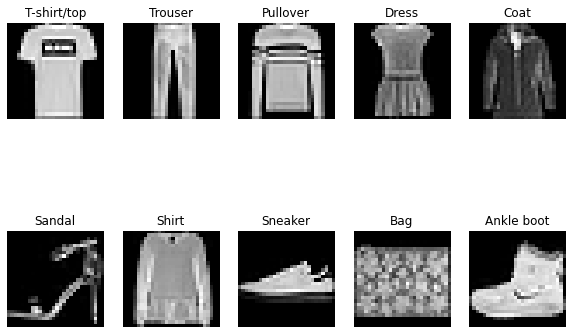

In [42]:
label=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))

rows=2
columns=5
fig = plt.figure(figsize=(10, 7))

for i,j in enumerate(indices):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_X[j],cmap ="gray")
        plt.axis('off')
        plt.title(label[i])


In [ ]:
import wandb


In [ ]:

!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:

wandb.init(project="DL-assignment1")
items,indices=np.unique(train_y,return_index=True)
labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

images = []
label = []
for i in (indices):
    images.append(train_X[i])
    label.append(labels[train_y[i]])
wandb.log({"Sample Image": [wandb.Image(img, caption=lbl) for img,lbl in zip(images, label)]})




wandb: Currently logged in as: amanvb-9213. Use `wandb login --relogin` to force relogin


In [5]:
#splitting train_X into training and validation set
X_train,X_validation=train_test_split(train_X,test_size=0.1,random_state=21,shuffle=True)
print("training data set:",X_train.shape,"\nvalidation data set:",X_validation.shape)
y_train,y_validation=train_test_split(train_y,test_size=0.1,random_state=21,shuffle=True)
print(y_train.shape,y_validation.shape)


training data set: (54000, 28, 28) 
validation data set: (6000, 28, 28)
(54000,) (6000,)


In [6]:
#making 2-D data matrix
X = np.array([itr.flatten() for itr in X_train])/255.0
X_test=np.array([itr.flatten() for itr in test_X])/255.0
validation_X=np.array([itr.flatten() for itr in X_validation])/255.0
#normalizing pixel
#train_X,test_X=train_X/255.0,test_X/255.


In [9]:
print(X.shape)
print(X_test.shape)
print(validation_X.shape)

(54000, 784)
(10000, 784)
(6000, 784)


In [22]:
#one hot encoding for y_train
y_train_one_hot = np.zeros((y_train.shape[0],10))
for i in range(y_train.shape[0]):
  y_train_one_hot[i,y_train[i]] = 1
#one hot encoding for y_validation
y_validation_one_hot = np.zeros((y_validation.shape[0],10))
for i in range(y_validation.shape[0]):
  y_validation_one_hot[i,y_validation[i]] = 1
#one hot encoding for test_y
test_y_one_hot = np.zeros((test_y.shape[0],10))
for i in range(test_y.shape[0]):
  test_y_one_hot[i,test_y[i]] = 1
print(y_train_one_hot[1])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [8]:
input_nodes=X.shape[1]
output_nodes=10
#nodes=[input_nodes,10,10,10,output_nodes]
#print(len(nodes))

In [9]:
def network_size(h_layers,h_nodes):
  nodes=[]
  nodes.append(input_nodes)
  for l in range(1,h_layers+1):
    nodes.append(h_nodes)
  nodes.append(output_nodes)

  return nodes

In [ ]:
print(len())

In [10]:
def init_param(nodes,mode):
  layers=len(nodes)
  
  theta={}
  if mode=='random':
    for i in range(1,layers):
      theta["W"+str(i)]=np.random.randn(nodes[i-1],nodes[i])
      #print(theta["W"+str(i)].shape)
      theta["b"+str(i)]=np.zeros((1,nodes[i]))

  elif(mode=='xavier'):
    for i in range(1,layers):
       #theta["W"+str(i)]= np.random.randn(nodes[i-1],nodes[i])*np.sqrt(2/(nodes[i-1]+nodes[i]))
       theta["W"+str(i)]=np.random.normal(loc=0.0, scale=np.sqrt(2/(nodes[i-1]+nodes[i])), size=(nodes[i-1],nodes[i]))
       theta["b"+str(i)]=np.zeros((1,nodes[i]))
    
  return theta

#activation functions

def sigmoid(x):
  return np.float64(1/(1+(np.exp(-x))))
  
# def softmax(x):
#   return np.float64(np.exp(x) / np.sum(np.exp(x),axis=1,keepdims=True)) 
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return (e_x )/(np.sum(e_x,axis=1))
# def softmax(z):
#     #assert len(z.shape) == 1
#     s = np.max(z, axis=1)
#     s = s[:, np.newaxis] 
#     e_x = np.exp(z - s)
#     div = np.sum(e_x, axis=1)
#     div = div[:, np.newaxis] 
#     return e_x / div


def ReLU(x):
  return np.float64(np.maximum(0,x))
def tanh(x):
    return np.float64(np.tanh(x))
def identity(x):
  return np.float64(x)




In [11]:
def activation_prime(x,activation):
  if activation=='sigmoid':
    return sigmoid(x)*(1-sigmoid(x))
  elif activation=='ReLU':
    #  d=np.zeros_like(x,dtype=np.float64)
    #  d[x>0]=1
    #  return 1.*(x>0)
    return (x>0).astype(int)
  elif activation=='tanh':
    return  (1 - (tanh(x)**2))
  elif activation=='identity':
    x1=np.ones_like(x,dtype=np.float64)
  return x1




In [ ]:
n=init_param(nodes)
len(n)

TypeError: ignored

In [28]:
def feed_forward(x,theta,activation):
  #print("x",x)
  layers=len(theta)//2
  #print(layers)
  H=[None]
  A=[]
  H[0]=np.array([x])  
  abc=H[0]
  #print(abc.shape)
  for i in range(1,layers+1):
    
    a=np.dot(abc,theta["W"+str(i)])+theta["b"+str(i)]
    
    A.append(a)
    # if i==5:
    #   # print("W3",theta["W"+str(i)],"b3",theta["b"+str(i)])##------ W4,W1,W2 and  remain same every time. itis not updating basically weights are not updating dW1,dW2 is coming 0 always
    #   # print(np.dot(abc,theta["W"+str(i)])+theta["b"+str(i)])
    #   print("A"+str(i-1),A[i-1])##--------every time A4 means A[3] is coming -ve and same value bec of this np.dot(abc,theta["W"+str(i)])+theta["b"+str(i)]
    if(i!=layers):
      if activation=='sigmoid':
        h=sigmoid(a)
        H.append(h)
      elif activation=='ReLU':
        h=ReLU(a)
        #print("h",h)
        H.append(h)
        #print("H"+str(i),H[i])##-------problem is H4 is becoming zero every time
      elif activation=='tanh':
        h=tanh(a)
        H.append(h)
      elif activation=='identity':
        h=identity(a)
        H.append(h)
        
    else:
       y_hat=(softmax(a))
       #H.append(h)
    abc=h
  #y_hat=H[layers]
  #print("y_hat",y_hat)
  return y_hat,H,A
    


NameError: ignored

In [ ]:
# def back_prop(y_hat,y,H,A,layers,theta,batch_size,activation):
#   delta=[]
#   delta[]=


In [100]:
def back_prop(y_hat,y,H,A,layers,theta,batch_size,activation):

  grads={}
  
  delta=(y_hat-y)
  for l in range(layers,0,-1):
    #print(H[l-1])
    grads["dW" + str(l)] = (np.matmul(np.array(H[l-1]).T,delta/batch_size))
    grads["db" + str(l)] = (np.sum(delta,axis=1,keepdims=True)/batch_size)##<---------

    if l>1:
      dH=(np.matmul(delta,theta["W"+str(l)].T))
      delta =(dH*activation_prime(A[l-2],activation)) ## A is starting from 0 index thats why l-2
  return grads

       





In [71]:
def update(nodes):
  layers=len(nodes)
  update={}

  for i in range(1,layers):
    update["W"+str(i)]=np.zeros((nodes[i-1],nodes[i]))
    update["b"+str(i)]=np.zeros((1,nodes[i]))
  return update

In [26]:
def zero(xyz,layers):
  for l in range(1,layers+1):
    xyz["dW"+str(l)]=0
    xyz["db"+str(l)]=0
  return xyz


In [117]:
def gradient_decent(typee,batch_size,epoch,lr,theta,activation):
  #theta=init_param(nodes)
  layers=len(theta)//2
  #print(layers)
  #last_loss=0
  loss=[]
  if typee=='sgd':
    for e in tqdm(range(epoch)):
      xyz={}
      
      xyz=zero(xyz,layers)
      for i in (range(X.shape[0])):
        y_hat,H,A=feed_forward(X[i],theta,activation)

        del_theta=back_prop(y_hat,y_train_one_hot[i],H,A,layers,theta,batch_size,activation)
        #print("dw5",del_theta["dW"+str(5)])
        for l in range(1,layers+1):
          if ("dW"+str(l)) in xyz:
            xyz["dW"+str(l)]+=del_theta["dW"+str(l)]
          else:
            xyz["dW"+str(l)]=del_theta["dW"+str(l)]
          if ("db"+str(l)) in xyz:
            xyz["db"+str(l)]+=del_theta["db"+str(l)]
          else:
            xyz["db"+str(l)]=del_theta["db"+str(l)]
        
        if (i+1)%batch_size==0:
          #print("dw4",del_theta["dW"+str(4)])
          for l in range(1,layers+1):
            theta["W"+str(l)]-=lr*del_theta["dW"+str(l)]
            theta["b"+str(l)]-=lr*del_theta["db"+str(l)]
          xyz=zero(xyz,layers) 
      if e%1==0:      
        y_hat,H,A=feed_forward(X,theta,activation)
        loss.append((-1.0 * np.sum(np.multiply(y_train_one_hot,np.log(y_hat+0.000000001))))/X.shape[0])
        print("epoch:",e+1,loss[-1])
        
          

  elif typee=='mgd':
    count=0
    m=0.5   ##this is beta for momentum
    last_loss=0
    prv_updates=update(nodes)
    for e in range(epoch):
      xyz={}
      for i in range(0,X.shape[0]):
        y_hat,H,A=feed_forward(X[i,:],theta,activation)
        #print(y_hat)
        del_theta=back_prop(y_hat,y_train_one_hot[i,:],H,A,layers,theta,batch_size,activation)
        for l in range(1,layers+1):
          if ("dW"+str(l)) in xyz:
            xyz["dW"+str(l)]+=del_theta["dW"+str(l)]
          else:
            xyz["dW"+str(l)]=del_theta["dW"+str(l)]
          if ("db"+str(l)) in xyz:
            xyz["db"+str(l)]+=del_theta["db"+str(l)]
          else:
            xyz["db"+str(l)]=del_theta["db"+str(l)]
        
        if (i+1)%batch_size==0:
          for l in range(1,layers+1):
            theta["W"+str(l)]=theta["W"+str(l)]-(m*prv_updates["W"+str(l)]+lr*xyz["dW"+str(l)])
            theta["b"+str(l)]=theta["b"+str(l)]-(m*prv_updates["b"+str(l)]+lr*xyz["db"+str(l)])
            prv_updates["W"+str(l)]=(m*prv_updates["W"+str(l)]+lr*xyz["dW"+str(l)])
            prv_updates["b"+str(l)]=(m*prv_updates["b"+str(l)]+lr*xyz["db"+str(l)])
          xyz={}
      y_hat,H,A=feed_forward(X,theta,activation)
      loss.append((-1.0 * np.sum(np.multiply(y_train_one_hot,np.log(y_hat+0.000000001))))/X.shape[0])
      print("epoch:",e+1,loss[-1])
      

  elif typee=='nag': 
    m=0.5
    theta_look_ahead={}
    prv_updates=update(nodes)
    for e in range(epoch):
      xyz={}
      for i in range(0,X.shape[0]):
        y_hat,H,A=feed_forward(X[i,:],theta,activation)
        for l in range(1,layers+1):
          theta_look_ahead["W"+str(l)]=theta["W"+str(l)]-m*prv_updates["W"+str(l)]
          theta_look_ahead["b"+str(l)]=theta["b"+str(l)]-m*prv_updates["b"+str(l)]


        del_theta=back_prop(y_hat,y_train_one_hot[i,:],H,A,layers,theta_look_ahead,batch_size,activation)
        for l in range(1,layers+1):
          if ("dW"+str(l)) in xyz:
            xyz["dW"+str(l)]+=del_theta["dW"+str(l)]
          else:
            xyz["dW"+str(l)]=del_theta["dW"+str(l)]
          if ("db"+str(l)) in xyz:
            xyz["db"+str(l)]+=del_theta["db"+str(l)]
          else:
            xyz["db"+str(l)]=del_theta["db"+str(l)]

        if (i+1)%batch_size==0:
          for l in range(1,layers+1):
            theta["W"+str(l)]=theta["W"+str(l)]-(m*prv_updates["W"+str(l)]+lr*xyz["dW"+str(l)])
            theta["b"+str(l)]=theta["b"+str(l)]-(m*prv_updates["b"+str(l)]+lr*xyz["db"+str(l)])
            prv_updates["W"+str(l)]=(m*prv_updates["W"+str(l)]+lr*xyz["dW"+str(l)])
            prv_updates["b"+str(l)]=(m*prv_updates["b"+str(l)]+lr*xyz["db"+str(l)])
          xyz={}
      y_hat,H,A=feed_forward(X,theta,activation)
      loss.append((-1.0 * np.sum(np.multiply(y_train_one_hot,np.log(y_hat+0.000000001))))/X.shape[0])
      print("epoch:",e+1,loss[-1])

  elif typee=='rmsprop':
    accumulate_grad=update(nodes)
    beta=0.5
    eps=0.000001
    
    for e in range(epoch):
      xyz={}
      for i in range(0,X.shape[0]):
        y_hat,H,A=feed_forward(X[i,:],theta,activation)
        del_theta=back_prop(y_hat,y_train_one_hot[i,:],H,A,layers,theta,batch_size,activation)
        for l in range(1,layers+1):
          if ("dW"+str(l)) in xyz:
            xyz["dW"+str(l)]+=del_theta["dW"+str(l)]
          else:
            xyz["dW"+str(l)]=del_theta["dW"+str(l)]
          if ("db"+str(l)) in xyz:
            xyz["db"+str(l)]+=del_theta["db"+str(l)]
          else:
            xyz["db"+str(l)]=del_theta["db"+str(l)]
        if (i+1)%batch_size==0:
          for l in range(1,layers+1):
            accumulate_grad["W"+str(l)]=beta*accumulate_grad["W"+str(l)]-(1-beta)*(xyz["dW"+str(l)])**2
            accumulate_grad["b"+str(l)]=beta*accumulate_grad["b"+str(l)]-(1-beta)*(xyz["db"+str(l)])**2
            theta["W"+str(l)]=theta["W"+str(l)]-(lr/np.sqrt(abs(accumulate_grad["W"+str(l)])+eps))*xyz["dW"+str(l)]
            theta["b"+str(l)]=theta["b"+str(l)]-(lr/np.sqrt(abs(accumulate_grad["b"+str(l)])+eps))*xyz["db"+str(l)]
          xyz={}
      y_hat,H,A=feed_forward(X,theta,activation)
      loss.append((-1.0 * np.sum(np.multiply(y_train_one_hot,np.log(y_hat+0.000000001))))/X.shape[0])
      print("epoch:",e+1,loss[-1])


  elif typee=='adam':
    updates=update(nodes)
    momentum=updates.copy()
    momentum_hat=updates.copy()
    accumulate_grad=updates.copy()
    accumulate_grad_hat=updates.copy()
    beta1=0.5
    beta2=0.5
    eps=0.000001
    last_loss=0
    for e in range(epoch):
      xyz={}
      for i in tqdm(range(0,X.shape[0])):##------------
        y_hat,H,A=feed_forward(X[i,:],theta,activation)
        del_theta=back_prop(y_hat,y_train_one_hot[i,:],H,A,layers,theta,batch_size,activation)
        for l in range(1,layers+1):
          if ("dW"+str(l)) in xyz:
            xyz["dW"+str(l)]+=del_theta["dW"+str(l)]
          else:
            xyz["dW"+str(l)]=del_theta["dW"+str(l)]
          if ("db"+str(l)) in xyz:
            xyz["db"+str(l)]+=del_theta["db"+str(l)]
          else:
            xyz["db"+str(l)]=del_theta["db"+str(l)]
        if (i+1)%batch_size==0:
          for l in range(1,layers+1):
            momentum["W"+str(l)]=beta1*momentum["W"+str(l)]+(1-beta1)*xyz["dW"+str(l)]
            momentum["b"+str(l)]=beta1*momentum["b"+str(l)]+(1-beta1)*xyz["db"+str(l)]
            accumulate_grad["W"+str(l)]=beta2*accumulate_grad["W"+str(l)]-(1-beta2)*(xyz["dW"+str(l)])**2
            accumulate_grad["b"+str(l)]=beta2*accumulate_grad["b"+str(l)]-(1-beta2)*(xyz["db"+str(l)])**2
            momentum_hat["W"+str(l)]=momentum["W"+str(l)]/(1-np.power(beta1,e+1))
            momentum_hat["b"+str(l)]=momentum["b"+str(l)]/(1-np.power(beta1,e+1))
            accumulate_grad_hat["W"+str(l)]=accumulate_grad["W"+str(l)]/(1-np.power(beta2,e+1))
            accumulate_grad_hat["b"+str(l)]=accumulate_grad["b"+str(l)]/(1-np.power(beta2,e+1))
            theta["W"+str(l)]=theta["W"+str(l)]-(lr/np.sqrt(np.abs(accumulate_grad_hat["W"+str(l)]+eps)))*momentum_hat["W"+str(l)]
            theta["b"+str(l)]=theta["b"+str(l)]-(lr/np.sqrt(np.abs(accumulate_grad_hat["b"+str(l)]+eps)))*momentum_hat["b"+str(l)]
          xyz={}
      y_hat,H,A=feed_forward(X,theta,activation)
      loss.append((-1.0 * np.sum(np.multiply(y_train_one_hot,np.log(y_hat+0.000000001))))/X.shape[0])
      print("epoch:",e+1,loss[-1])


    
  #elif type=='nadam':
  return theta,loss


  

 10%|█         | 1/10 [00:14<02:06, 14.02s/it]

epoch: 1 10.703990479010164


 20%|██        | 2/10 [00:28<01:52, 14.03s/it]

epoch: 2 10.64543648593288


 30%|███       | 3/10 [00:42<01:37, 13.99s/it]

epoch: 3 10.529667821140027


 40%|████      | 4/10 [00:55<01:23, 13.99s/it]

epoch: 4 10.382350338365557


 50%|█████     | 5/10 [01:10<01:10, 14.06s/it]

epoch: 5 10.305448956232473


 60%|██████    | 6/10 [01:24<00:56, 14.12s/it]

epoch: 6 10.268377032633675


 70%|███████   | 7/10 [01:38<00:42, 14.03s/it]

epoch: 7 10.310567976775644


 80%|████████  | 8/10 [01:52<00:28, 14.03s/it]

epoch: 8 10.353945737303054


 90%|█████████ | 9/10 [02:06<00:13, 13.98s/it]

epoch: 9 10.465433356145429


100%|██████████| 10/10 [02:20<00:00, 14.01s/it]

epoch: 10 10.518926567925702


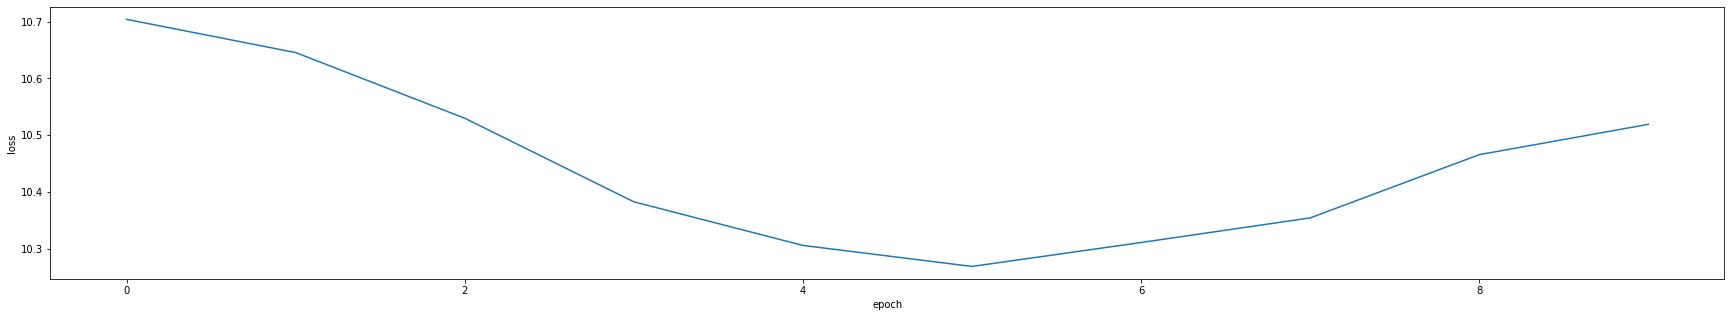

In [119]:
nodes=network_size(4,10)
theta=init_param(nodes,'xavier')
#print(len(theta))
theta,loss=gradient_decent('sgd',5,10,0.001,theta,'ReLU')
#print(theta)
fig,axs=plt.subplots(figsize=(30,5))
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



In [ ]:
print(len(nodes))
theta["W"+'2']

In [ ]:
sweep_configuration={'name':'EE22s037','method':'random',
                     'metric':{'name':'val_acc','goal':'maximize'},
                     'parameters':{
                                   'epochs':{'values':[5,10]},
                                   'hidden_layers':{'values':[3,4,5]},
                                   'numbers_neurons':{'values':[32,64,128]},
                                   'learning_rate':{'values':[1e-3,1e-4]},
                                   'optimizers':{'values':['sgd','adam']},
                                   'batch_size':{'values':[16,32,64]},
                                   'wt_init':{'values':['random','xavier']},
                                   'activation':{'values':['sigmoid','tanh','ReLU']}
                                   }
    
}
sweep_id=wandb.sweep(sweep=sweep_configuration,entity="EE22S037",project='DL-assignment1')







def tune():
  wandb.init(project='DL-assignment1')
  epochs=wandb.config.epochs
  h_layers=wandb.config.hidden_layers
  nodes=wandb.config.numbers_neurons
  lr=wandb.config.learning_rate
  optimizer=wandb.config.optimizers
  batch_size=wandb.config.batch_size
  init_mode=wandb.config.wt_init
  activation=wandb.config.activation

  run_name="ep_{}_hl_{}_nodes_{}_lr_{}_opti_{}_bs_{}_mode_{}_acf_{}".format(epochs,h_layers,nodes,lr,optimizer,batch_size,init_mode,activation)


In [ ]:
import wandb
import numpy as np 
import random

# Define sweep config
sweep_configuration = {
    'method': 'random',
    'name': 'sweep',
    'metric': {'goal': 'maximize', 'name': 'val_acc'},
    'parameters': 
    {
        'batch_size': {'values': [16, 32, 64]},
        'epochs': {'values': [5, 10, 15]},
        'lr': {'max': 0.1, 'min': 0.0001}
     }
}

# Initialize sweep by passing in config. (Optional) Provide a name of the project.
sweep_id = wandb.sweep(sweep=sweep_configuration, project='my-first-sweep')

# Define training function that takes in hyperparameter values from `wandb.config` and uses them to train a model and return metric
def train_one_epoch(epoch, lr, bs): 
  acc = 0.25 + ((epoch/30) +  (random.random()/10))
  loss = 0.2 + (1 - ((epoch-1)/10 +  random.random()/5))
  return acc, loss

def evaluate_one_epoch(epoch): 
  acc = 0.1 + ((epoch/20) +  (random.random()/10))
  loss = 0.25 + (1 - ((epoch-1)/10 +  random.random()/6))
  return acc, loss

def main():
    run = wandb.init()

    # note that we define values from `wandb.config` instead 
    # of defining hard values
    lr  =  wandb.config.lr
    bs = wandb.config.batch_size
    epochs = wandb.config.epochs

    for epoch in np.arange(1, epochs):
      train_acc, train_loss = train_one_epoch(epoch, lr, bs)
      val_acc, val_loss = evaluate_one_epoch(epoch)

      wandb.log({
        'epoch': epoch, 
        'train_acc': train_acc,
        'train_loss': train_loss, 
        'val_acc': val_acc, 
        'val_loss': val_loss
      })

# Start sweep job.
wandb.agent(sweep_id, function=main, count=4)

TypeError: ignored

In [ ]:
A=[[1,2,3],[4,5,6]]
b=[[4,5,6],[5,6,7]]
A=A+b
print(A)

[[1, 2, 3], [4, 5, 6], [4, 5, 6], [5, 6, 7]]


In [ ]:
a=[]
a[4]=2

IndexError: ignored

In [ ]:
l=5
nodes=[]

ipf=784
opc=10
neurons=32
nodes.append(ipf)
for i in range(1,l):
  print(i)
  nodes.append(neurons)
nodes.append(opc)

print(nodes)


1
2
3
4
[784, 32, 32, 32, 32, 10]


In [95]:
layers=5
for l in range(1,layers+1):
  print(l)

1
2
3
4
5


ZeroDivisionError: ignored